In [177]:
import pandas as pd
import networkx as nx
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

# Function to convert semester string to datetime object
def convert_semester_to_date(semester_str):
    months = {"Spring": 1, "Summer": 6, "SummerOne" : 5, "SummerTwo" : 7, "Fall": 9}
    season = ""

    if pd.isnull(semester_str):
        return None

    split_str = semester_str.split()
    year = split_str[-1]
    season_words = split_str[0:len(split_str)-1] #Because of summer sessions, EG: "Summer One 2022"
    for i in season_words:
        season += i
    
    return int(str(year)+str(months[season]))

# Load the Excel file
df = pd.read_excel('/home/lithium/Network-Science-Project/CS Course Enrollment Data 030824.xlsx')

for col in df.columns:
    print(col)

# Get all the semester columns.
semester_cols = df.columns[3:-2]

for col in semester_cols:
    df[col] = df[col].apply(convert_semester_to_date)

for col in semester_cols:
    df[col].fillna(0,inplace=True)


ADMIT_ACADEMIC_PERIOD_DESC
PRIMARY_1ST_MAJOR_DESC
PRIMARY_1ST_DEPARTMENT_DESC
CSCI101_Pass_Sem
CSCI101_Tran_Sem
CSCI128_Pass_Sem
CSCI128_Tran_Sem
CSCI200_Pass_C_Sem
CSCI200_Tran_Sem
CSCI210_Pass_Sem
CSCI220_Pass_Sem
CSCI220_Tran_Sem
CSCI261_Pass_C_Sem
CSCI261_Tran_Sem
CSCI262_Pass_Sem
CSCI262_Tran_Sem
CSCI274_Pass_Sem
CSCI306_Pass_Sem
CSCI341_Pass_Sem
CSCI358_Pass_Sem
CSCI370_Pass_Sem
CSCI400_Pass_Sem
CSCI406_Pass_Sem
CSCI442_Pass_Sem
MATH111_Pass_Sem
MATH111_Tran_Sem
MATH112_Pass_Sem
MATH113_Pass_Sem
MATH122_Pass_Sem
MATH213_Pass_Sem
MATH214_Pass_Sem
MATH223_Pass_Sem
MATH224_Pass_Sem
MATH225_Pass_Sem
MATH235_Pass_Sem
MATH300_Pass_Sem
MATH307_Pass_Sem
MATH332_Pass_Sem
MATH342_Pass_Sem
PHGN100_Pass_Sem
PHGN100_Tran_Sem
PHGN200_Pass_Sem
CSCI404_Pass_Sem
CSCI410_Pass_Sem
CSCI422_Pass_Sem
CSCI423_Pass_Sem
CSCI425_Pass_Sem
CSCI432_Pass_Sem
CSCI436_Pass_Sem
CSCI437_Pass_Sem
CSCI440_Pass_Sem
CSCI441_Pass_Sem
CSCI443_Pass_Sem
CSCI444_Pass_Sem
CSCI445_Pass_Sem
CSCI446_Pass_Sem
CSCI448_Pass_Sem


In [184]:
#Assume that the dataframe is only the pass/ransfer dates.
pass_df = df.drop(columns=[df.columns[0],df.columns[1],df.columns[2],df.columns[-1]])
#Drop any useless columns
cols_to_drop = [col for col in pass_df.columns if len(pass_df[col].unique()) == 1]
print(cols_to_drop)
pass_df = pass_df.drop(cols_to_drop, axis=1)

pass_df.head()

['CSCI210_Pass_Sem', 'CSCI443_Pass_Sem']


,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI220_Pass_Sem,CSCI220_Tran_Sem,CSCI261_Pass_C_Sem,CSCI261_Tran_Sem,...,CSCI446_Pass_Sem,CSCI448_Pass_Sem,CSCI455_Pass_Sem,CSCI470_Pass_Sem,CSCI471_Pass_Sem,CSCI473_Pass_Sem,CSCI474_Pass_Sem,CSCI475_Pass_Sem,CSCI477_Pass_Sem,CSCI478_Pass_Sem
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20199.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,20189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20199.0,20199.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


CSCI358_Pass_Sem
CSCI406_Pass_Sem
CSCI442_Pass_Sem
CSCI475_Pass_Sem
CSCI478_Pass_Sem
CSCI262_Pass_Sem
CSCI406_Pass_Sem
CSCI478_Pass_Sem
CSCI101_Pass_Sem
CSCI262_Pass_Sem
CSCI274_Pass_Sem
CSCI306_Pass_Sem
CSCI341_Pass_Sem
CSCI358_Pass_Sem
CSCI370_Pass_Sem
CSCI400_Pass_Sem
CSCI406_Pass_Sem
CSCI442_Pass_Sem
MATH225_Pass_Sem
MATH332_Pass_Sem
CSCI404_Pass_Sem
CSCI440_Pass_Sem
CSCI445_Pass_Sem
CSCI470_Pass_Sem
CSCI471_Pass_Sem
CSCI478_Pass_Sem
CSCI306_Pass_Sem
CSCI400_Pass_Sem
PHGN100_Pass_Sem
PHGN200_Pass_Sem
CSCI478_Pass_Sem
CSCI262_Pass_Sem
CSCI306_Pass_Sem
CSCI358_Pass_Sem
CSCI400_Pass_Sem
CSCI406_Pass_Sem
CSCI442_Pass_Sem
CSCI478_Pass_Sem
CSCI261_Pass_C_Sem
MATH111_Tran_Sem
MATH112_Pass_Sem
MATH213_Pass_Sem
MATH225_Pass_Sem
PHGN100_Tran_Sem
PHGN200_Pass_Sem
CSCI478_Pass_Sem
CSCI261_Pass_C_Sem
MATH111_Tran_Sem
MATH307_Pass_Sem
PHGN100_Tran_Sem
CSCI478_Pass_Sem
CSCI261_Pass_C_Sem
PHGN100_Pass_Sem
PHGN200_Pass_Sem
CSCI478_Pass_Sem
CSCI261_Tran_Sem
MATH122_Pass_Sem
MATH223_Pass_Sem
MATH225_

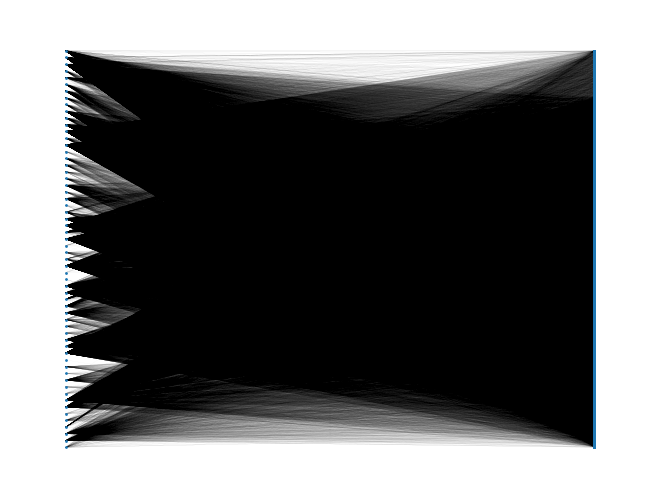

In [195]:
U = list(pass_df.columns)
V = list(pass_df.index.values)
G = nx.Graph()

for id, row in pass_df.iterrows():
    for col_id, col in enumerate(row):        
        if col != 0.0:
            G.add_edge(id,pass_df.columns[col_id])
            print(pass_df.columns[col_id])

assert(nx.bipartite.is_bipartite(G) == True)

nx.draw(G, pos=nx.bipartite_layout(G, U),  node_size=1, width=0.01)

In [175]:
print("CSCI210_Pass_Sem" in G.nodes)

False


In [208]:
#Projecting the graph to see any conflicts.
Proj = nx.bipartite.weighted_projected_graph(G, U)

In [222]:
import matplotlib.pyplot as plt

def draw_projection(Proj):
    pos = nx.spring_layout(Proj) 
    plt.figure(figsize=(10, 10))
    nx.draw_networkx(Proj, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=10)
    edge_labels = nx.get_edge_attributes(Proj, 'weight')
    nx.draw_networkx_edge_labels(Proj, pos, edge_labels=edge_labels)
    plt.show()

In [223]:

# #Filtering out edges with < 500 connections
# edges = []
# for u, v, weight in Proj.edges(data='weight'):
#     if weight < 500:
#         edges.append((u,v))

# for u,v in edges:
#     Proj.remove_edge(u,v)


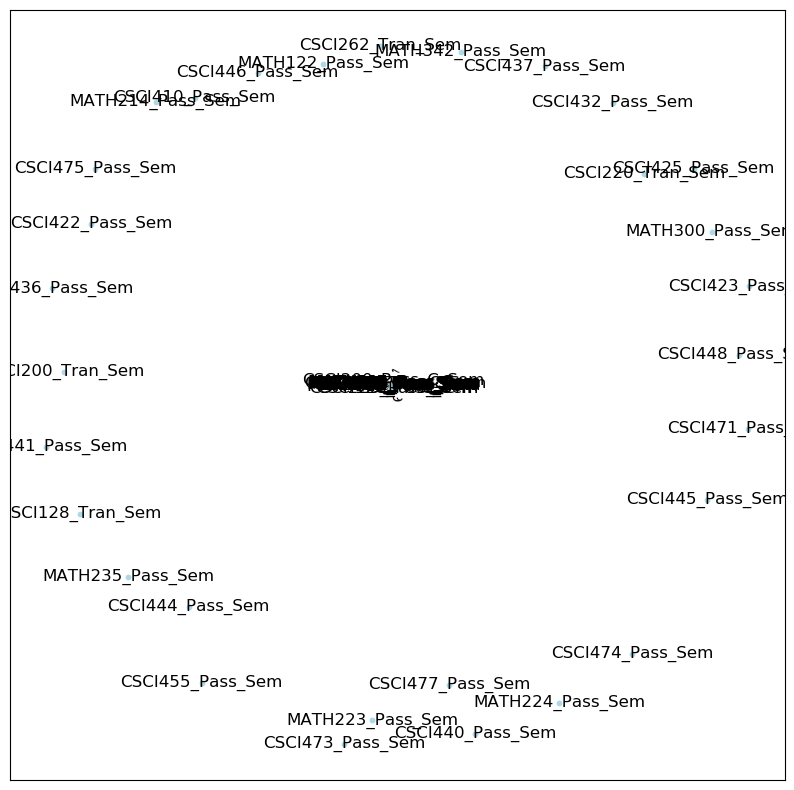

In [224]:
draw_projection(Proj)